In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Initialize arrays for data and labels
X_train = []
Y_train = []

image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [4]:
# Load images from training folder
for label in labels:
    folderPath = os.path.join('./training', label)  # Adjusted path
    for file in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, file))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)

In [5]:
# Load images from testing folder
for label in labels:
    folderPath = os.path.join('./testing', label)  # Adjusted path
    for file in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, file))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)

In [6]:
# Convert data to numpy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [7]:
# Shuffle the data
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=101)

In [8]:


# Convert labels to numerical format (one-hot encoding)
y_train_new = [labels.index(i) for i in y_train]
y_train = tf.keras.utils.to_categorical(y_train_new)

In [9]:

y_test_new = [labels.index(i) for i in y_test]
y_test = tf.keras.utils.to_categorical(y_test_new)

In [10]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))  # 4 classes (one for each tumor type)

C:\Users\FatimaTasneem\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)


Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 323s 4s/step - accuracy: 0.2885 - loss: 4.9777 - val_accuracy: 0.2710 - val_loss: 1.3658
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 318s 4s/step - accuracy: 0.3162 - loss: 1.3497 - val_accuracy: 0.4733 - val_loss: 1.1421
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 324s 4s/step - accuracy: 0.5441 - loss: 1.0434 - val_accuracy: 0.5496 - val_loss: 1.0038
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 335s 5s/step - accuracy: 0.6074 - loss: 0.9416 - val_accuracy: 0.6107 - val_loss: 0.8550
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 346s 5s/step - accuracy: 0.6274 - loss: 0.8319 - val_accuracy: 0.5229 - val_loss: 1.1090
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 412s 5s/step - accuracy: 0.6478 - loss: 0.7863 - val_accuracy: 0.6183 - val_loss: 0.7797
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 374s 5s/step - accuracy: 0.7022 - loss: 0.6808 - val_accuracy: 0.6718 - val_loss: 0.7146
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 322s 4s/step - accuracy: 0.7718 - loss: 0.5634 - val_accuracy: 0.6450 - v

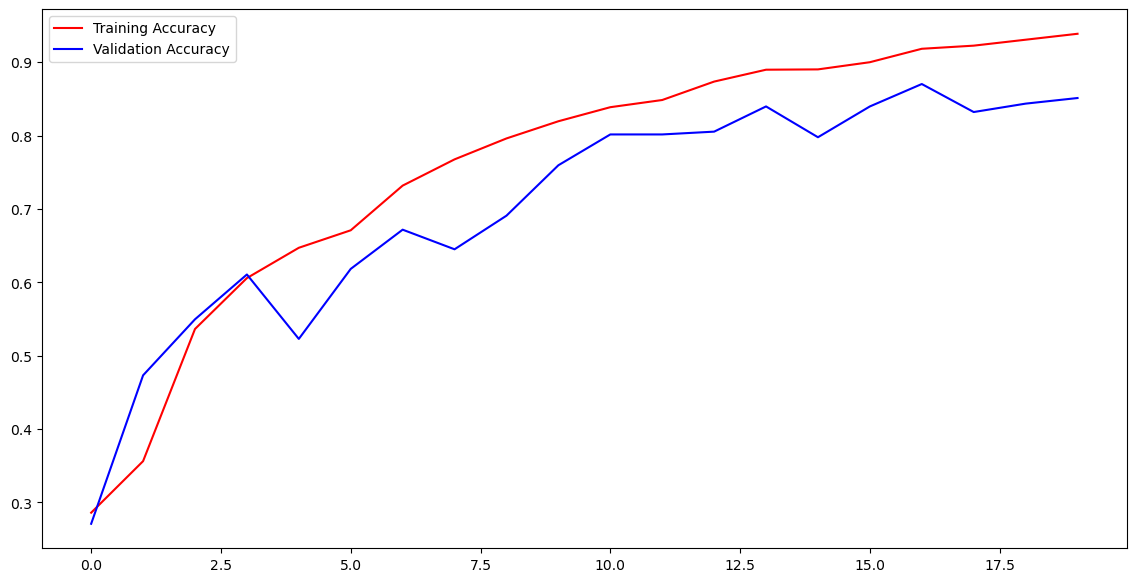

In [13]:
# Plot accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.figure(figsize=(14, 7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

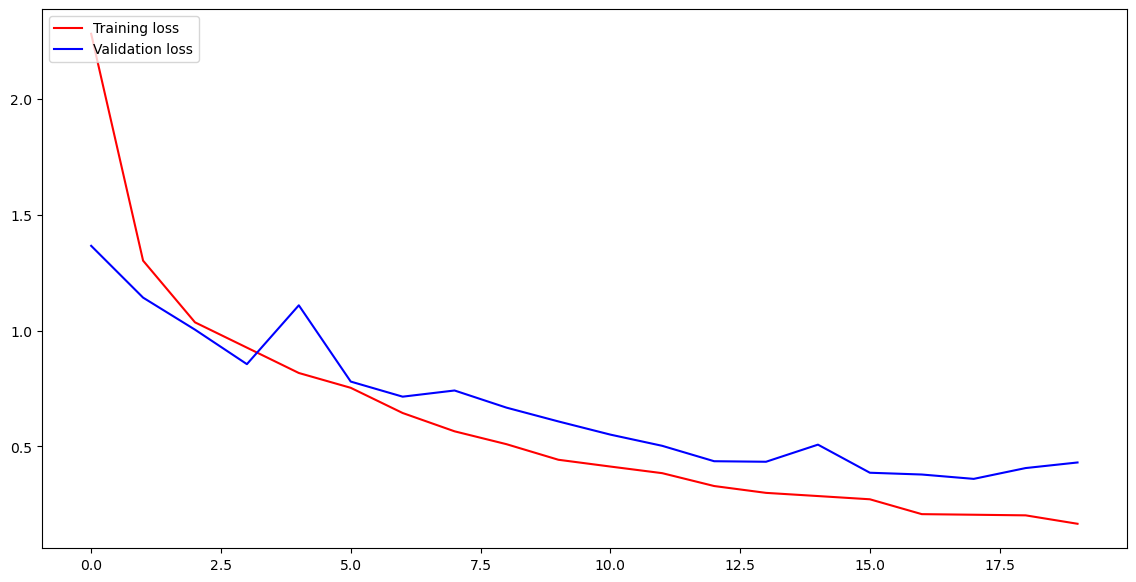

In [14]:
# Plot loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure(figsize=(14, 7))
plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [15]:
# Test with a sample image
img = cv2.imread('./training/pituitary_tumor/p (107).jpg')  # Adjusted path
img = cv2.resize(img, (150, 150))
img_array = np.array(img).reshape(1, 150, 150, 3)


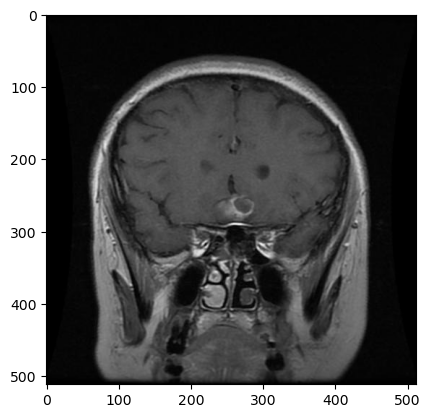

In [16]:

# Display the test image
from tensorflow.keras.preprocessing import image
img_disp = image.load_img('./training/pituitary_tumor/p (107).jpg')
plt.imshow(img_disp)
plt.show()

In [17]:

# Predict
prediction = model.predict(img_array)
indices = prediction.argmax()
print("Predicted class:", labels[indices])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
Predicted class: pituitary_tumor
